# Import the data and cleaning a few things

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet

students_loc = "Enrolment of Students in Educational Institutes of Pakistan 1947-2018.csv"
teachers_loc = "Number of Teachers in Educational Institutions of Pakistan 1947-2018.csv"

def get_encoding(loc):
    """Reads encoding from given file."""
    with open(loc, "rb") as f:
        result = chardet.detect(f.read())
        return result["encoding"]

def load_csv(loc, year_col="Year"):
    return pd.read_csv(loc,
                       thousands=",", # Entfernt tausender Trennzeichen
                       converters = {year_col: lambda x: x[:4]}, # Konvertiert das Datum von dem vollen String in die ersten 4 Zeichen
                       parse_dates=[year_col], # Wird in ein Datetime Format geändert
                       index_col=year_col, # Index wird auf die Col Year gesetzt
                       encoding=get_encoding(loc), # Richtiges Encoding für die CSV bekommen
                       na_values=["–"] # NA-Values erkennen 
                       ).rename(
                           columns={"Primary": "primary",
                                    "Middle": "middle",
                                    "High": "high",
                                    "Higher Sec/Colleges": "higher_sec_colleges",
                                    "Higher Secondary Colleges": "higher_sec_colleges",
                                    "Degree Colleges": "degree_colleges",
                                    "Degree College": "degree_colleges",
                                    "Tech Inst": "technical_institutes",
                                    "Technical Institutes": "technical_institutes", 
                                    "Universities": "universities"}
                       )


dfs = load_csv(students_loc)
dft = load_csv(teachers_loc)

# identify dulicates and remove them

In [3]:
dft.duplicated().sum()

np.int64(2)

In [4]:
dfs.duplicated().sum()

np.int64(0)

In [5]:
dft[dft.duplicated()]

,primary,middle,high,higher_sec_colleges,degree_colleges,technical_institutes,universities
Year,,,,,,,
1978-01-01,136900,49900,62900,11836.0,3443.0,2532.0,3573.0
1979-01-01,140900,51400,63800,12077.0,3500.0,2817.0,3068.0


In [6]:
dft = dft.drop_duplicates()

# Overlook on data

In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 1947-01-01 to 2017-01-01
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   primary               63 non-null     int64
 1   middle                63 non-null     int64
 2   high                  63 non-null     int64
 3   higher_sec_colleges   63 non-null     int64
 4   degree_colleges       63 non-null     int64
 5   technical_institutes  63 non-null     int64
 6   universities          63 non-null     int64
dtypes: int64(7)
memory usage: 3.9 KB


In [8]:
dfs.describe()

,primary,middle,high,higher_sec_colleges,degree_colleges,technical_institutes,universities
count,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,63.000000,63.000000,6.300000e+01
mean,1.230724e+07,2.761965e+06,1.187121e+06,5.049366e+05,186428.984127,103846.333333,2.912076e+05
std,1.010659e+07,2.116193e+06,1.057360e+06,4.565306e+05,186538.496210,106683.683209,4.800834e+05
min,7.700000e+05,2.210000e+05,5.800000e+04,1.400000e+04,4368.000000,4000.000000,6.440000e+02
25%,4.085000e+06,9.480000e+05,3.515000e+05,1.860000e+05,36713.500000,29000.000000,1.728200e+04
50%,7.639000e+06,2.023000e+06,7.080000e+05,3.870000e+05,72479.000000,66000.000000,6.131900e+04
75%,1.868396e+07,4.105239e+06,1.714159e+06,6.277175e+05,319600.000000,106295.000000,3.040095e+05
max,3.550560e+07,7.362135e+06,3.861274e+06,1.698047e+06,641539.000000,433237.000000,1.594648e+06


In [9]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 1947-01-01 to 2017-01-01
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   primary               63 non-null     int64  
 1   middle                63 non-null     int64  
 2   high                  63 non-null     int64  
 3   higher_sec_colleges   55 non-null     float64
 4   degree_colleges       55 non-null     float64
 5   technical_institutes  55 non-null     float64
 6   universities          59 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 3.9 KB


In [10]:
dft.describe()

,primary,middle,high,higher_sec_colleges,degree_colleges,technical_institutes,universities
count,63.000000,63.000000,63.000000,55.000000,55.000000,55.000000,59.000000
mean,248641.333333,136652.015873,181538.174603,39346.818182,11719.054545,7552.890909,17536.237288
std,161698.073739,132714.146267,174332.263541,38098.732159,12764.806658,5525.193088,26060.633919
min,17800.000000,10700.000000,6800.000000,4938.000000,1137.000000,1436.000000,382.000000
25%,101000.000000,35100.000000,37150.000000,11691.000000,3249.000000,2557.000000,2391.000000
50%,189400.000000,58200.000000,92900.000000,20548.000000,4621.000000,6949.000000,4162.000000
75%,424496.500000,233183.500000,273569.000000,57781.000000,13449.000000,9347.000000,21804.000000
max,522369.000000,455445.000000,563302.000000,132011.000000,48809.000000,19393.000000,88288.000000


# Merging the dataframes

In [11]:
df = pd.merge(dfs, dft, left_index=True, right_index=True, suffixes=("_students", "_teachers"))
df

,primary_students,middle_students,high_students,higher_sec_colleges_students,degree_colleges_students,technical_institutes_students,universities_students,primary_teachers,middle_teachers,high_teachers,higher_sec_colleges_teachers,degree_colleges_teachers,technical_institutes_teachers,universities_teachers
Year,,,,,,,,,,,,,,
1947-01-01,770000,221000,58000,14000,4368,4000,644,17800,12000,6800,NaN,NaN,NaN,NaN
1948-01-01,830000,225000,59000,17000,4517,4000,690,17800,12000,7000,NaN,NaN,NaN,NaN
1949-01-01,920000,250000,67000,21000,4925,5000,737,19900,12100,8000,NaN,NaN,NaN,NaN
1954-01-01,1550000,332000,109000,43000,8082,11000,1998,35500,10700,12700,NaN,NaN,NaN,NaN
1959-01-01,1890000,422000,149000,76000,12434,13000,4092,44800,13000,18300,NaN,NaN,NaN,382.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,28708850,6460781,3108963,1233704,465435,308613,1594648,426415,364839,500464,124336.0,25964.0,16377.0,77557.0
2014-01-01,29436047,6582173,3500692,1665490,510588,319937,1299160,430920,380785,514158,118079.0,36587.0,19393.0,88288.0
2015-01-01,31342307,6922251,3652537,1698047,518144,315168,1355649,455324,394231,529520,123061.0,37082.0,18157.0,83375.0


# Short Test Plots to see the Growth

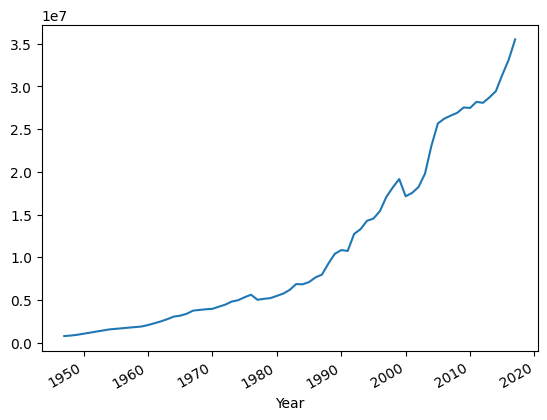

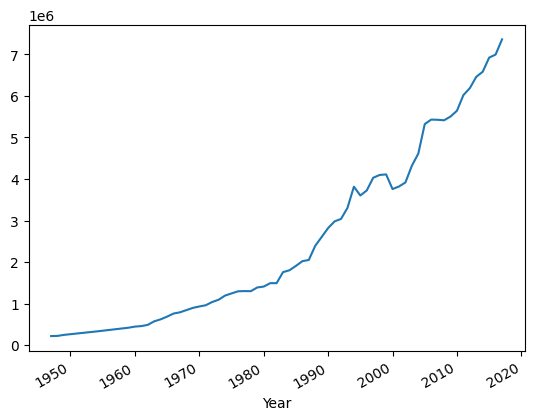

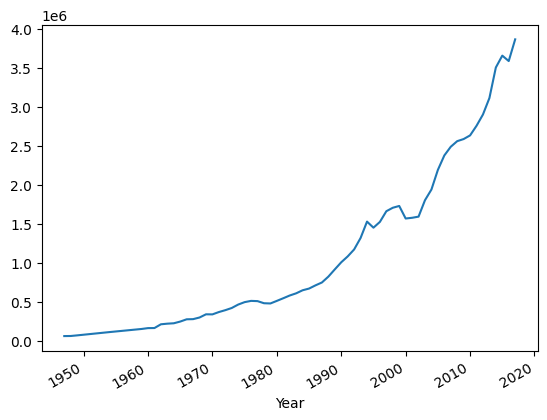

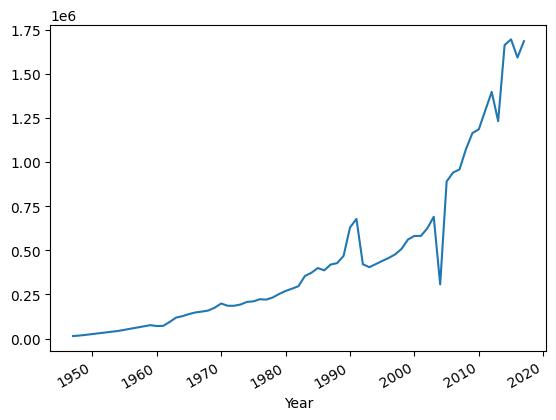

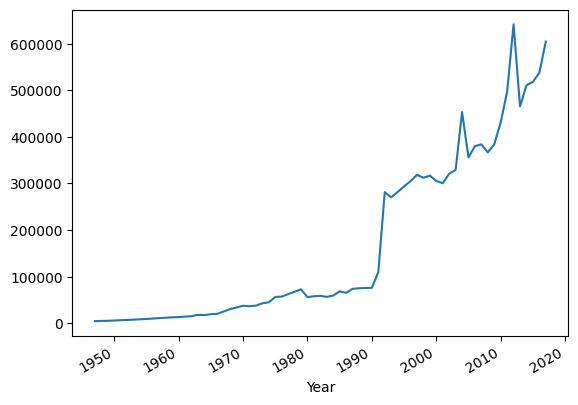

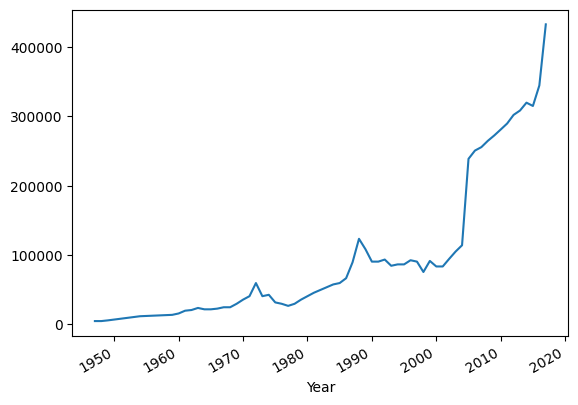

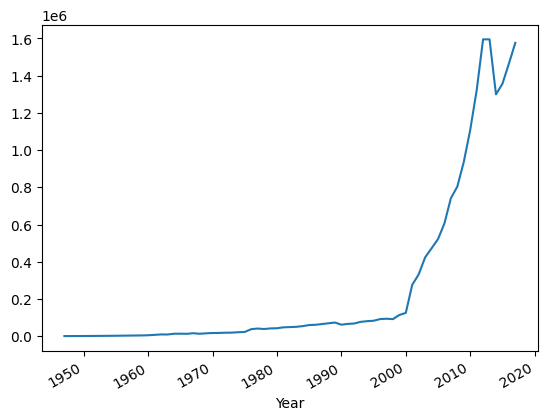

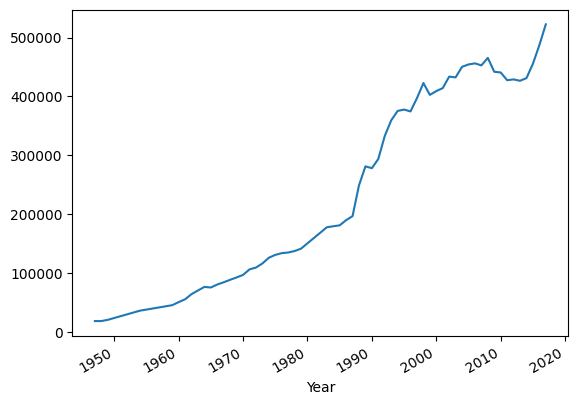

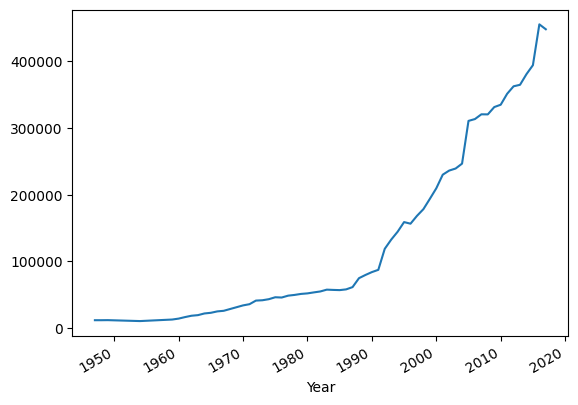

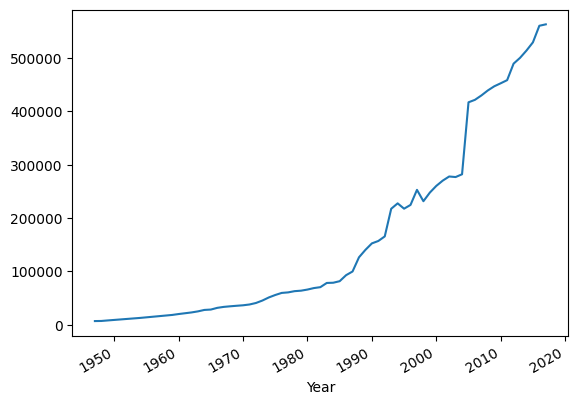

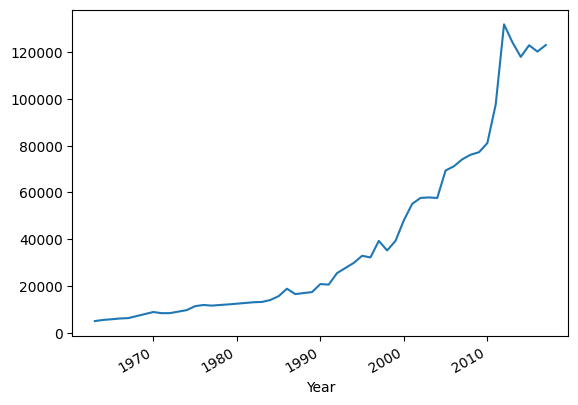

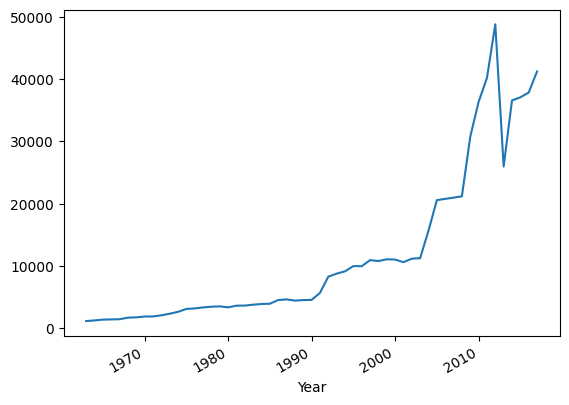

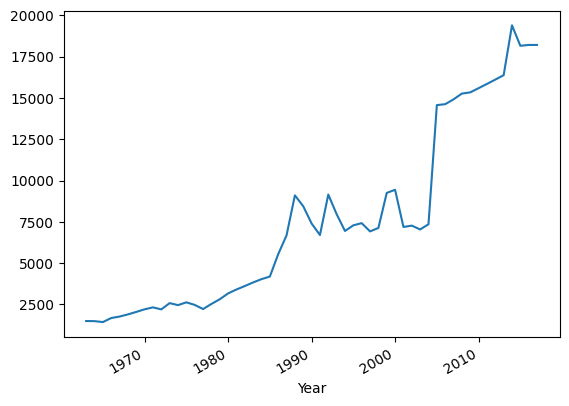

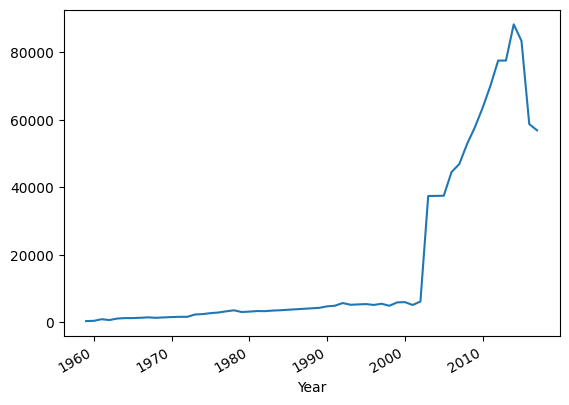

In [12]:
for col_name in df.columns:
    df[col_name].plot()
    plt.show()

# Testing Linear Regression, wont give me the right values because we can see the growth is exponential.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
col_name = "primary_students"
X = df[col_name].index.year.values.reshape(-1, 1) # Hier wird gereshaped von einem vektor (array) auf eine Matrix mit einer Spalte und beliebig vielen Zeilen
y = df[col_name].values

model = LinearRegression() # Modell erstellen

model.fit(X, y) # Modell trainieren

y_pred = model.predict(X)
y_pred

array([-6802070.98994958, -6306440.45171702, -5810809.91348445,
       -3332657.22232187,  -854504.53115916,  -358873.99292672,
         136756.54530585,   632387.08353841,  1128017.62177086,
        1623648.16000342,  2119278.69823599,  2614909.23646855,
        3110539.774701  ,  3606170.31293356,  4101800.85116613,
        4597431.38939857,  5093061.92763114,  5588692.4658637 ,
        6084323.00409615,  6579953.54232872,  7075584.08056128,
        7571214.61879385,  8066845.15702629,  8562475.69525886,
        9058106.23349142,  9553736.77172387, 10049367.30995643,
       10544997.848189  , 11040628.38642144, 11536258.92465401,
       12031889.46288657, 12527520.00111914, 13023150.53935158,
       13518781.07758415, 14014411.61581671, 14510042.15404916,
       15005672.69228172, 15501303.23051429, 15996933.76874673,
       16492564.3069793 , 16988194.84521186, 17483825.38344443,
       17979455.92167687, 18475086.45990944, 18970716.998142  ,
       19466347.53637445, 19961978.07460

Steigung b: [105774.84829893]
Y-Achsenschnitt a: -207259872.8367102


<Axes: xlabel='Year'>

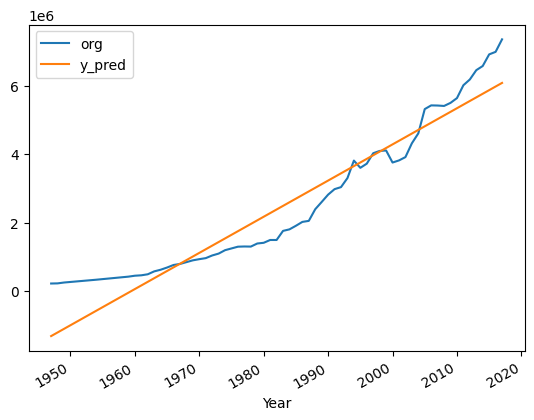

In [15]:
col_name = "middle_students"

X = df[col_name].index.year.values.reshape(-1, 1)
y = df[col_name].values

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

print(f"Steigung b: {model.coef_}")
print(f"Y-Achsenschnitt a: {model.intercept_}")

pd.DataFrame({"org": df[col_name], "y_pred": y_pred}).plot()

/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_29175/2718347571.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

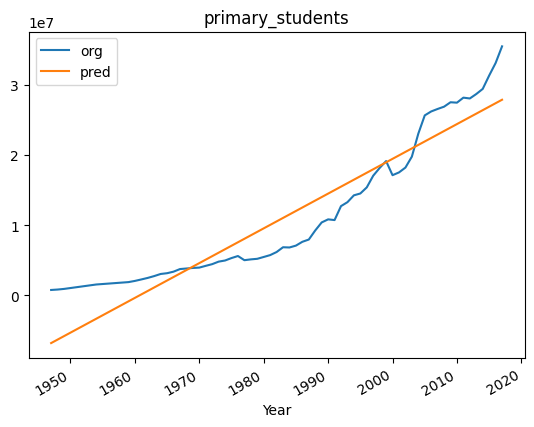

<Figure size 1000x600 with 0 Axes>

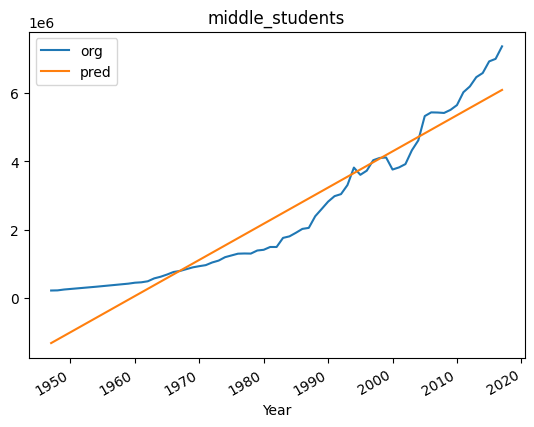

<Figure size 1000x600 with 0 Axes>

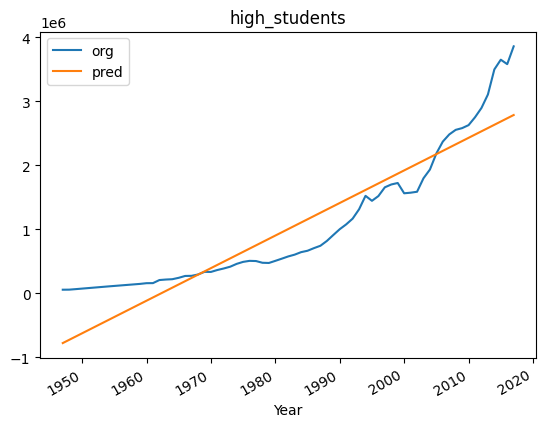

<Figure size 1000x600 with 0 Axes>

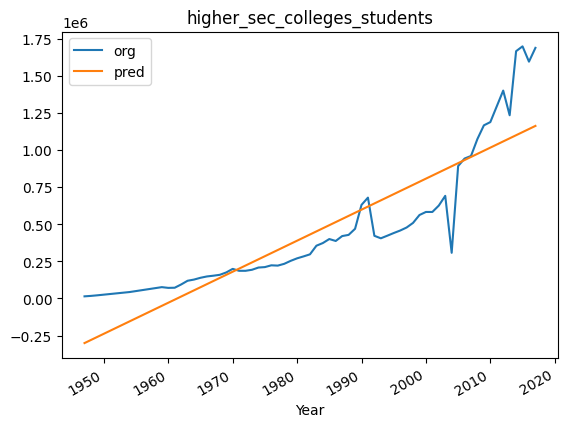

<Figure size 1000x600 with 0 Axes>

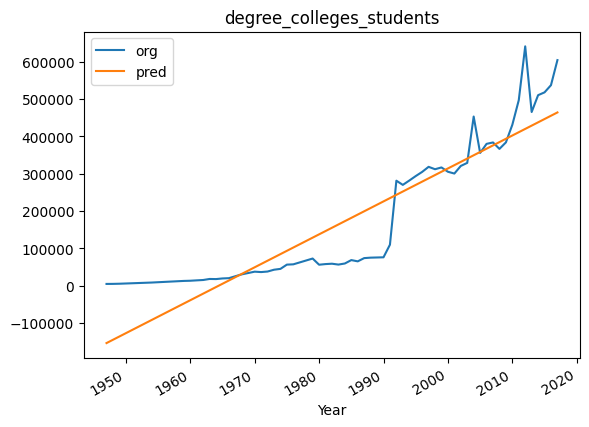

<Figure size 1000x600 with 0 Axes>

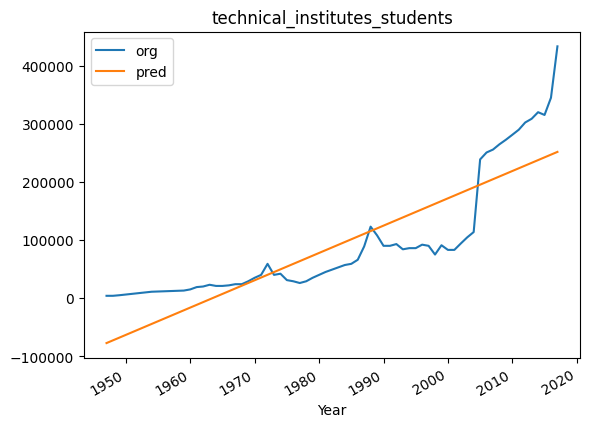

<Figure size 1000x600 with 0 Axes>

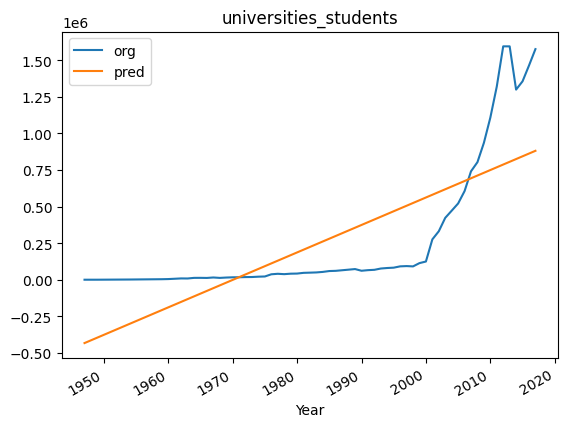

<Figure size 1000x600 with 0 Axes>

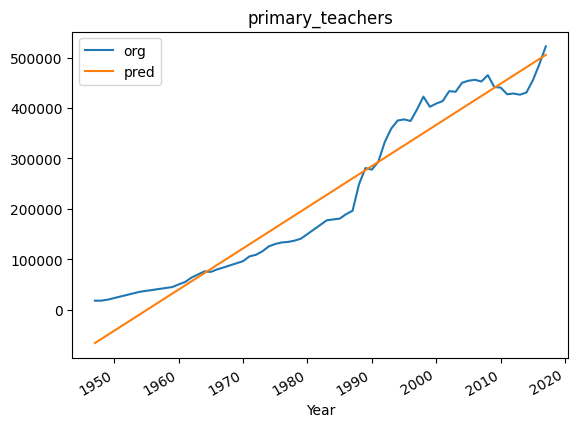

<Figure size 1000x600 with 0 Axes>

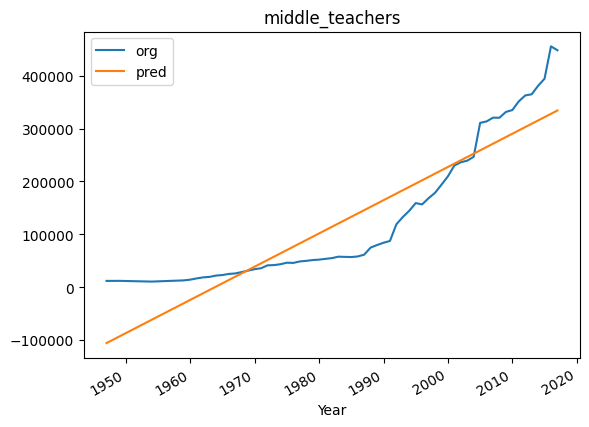

<Figure size 1000x600 with 0 Axes>

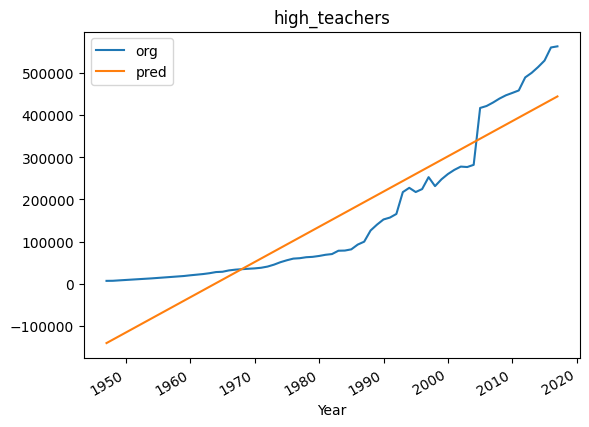

<Figure size 1000x600 with 0 Axes>

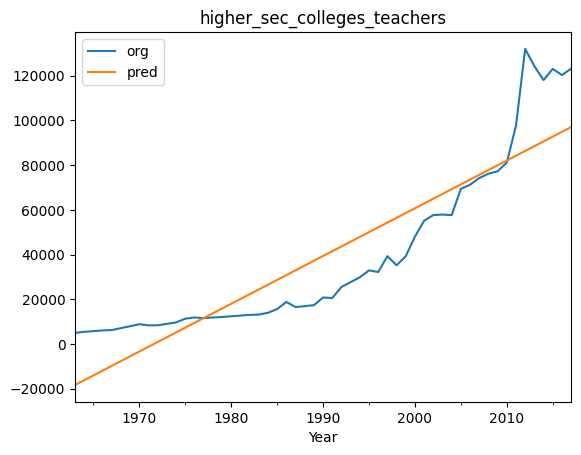

<Figure size 1000x600 with 0 Axes>

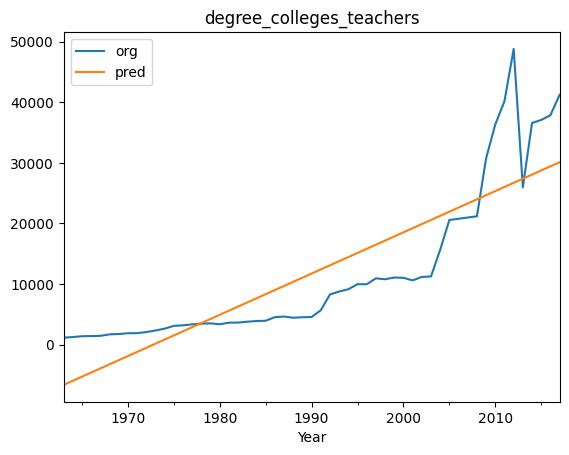

<Figure size 1000x600 with 0 Axes>

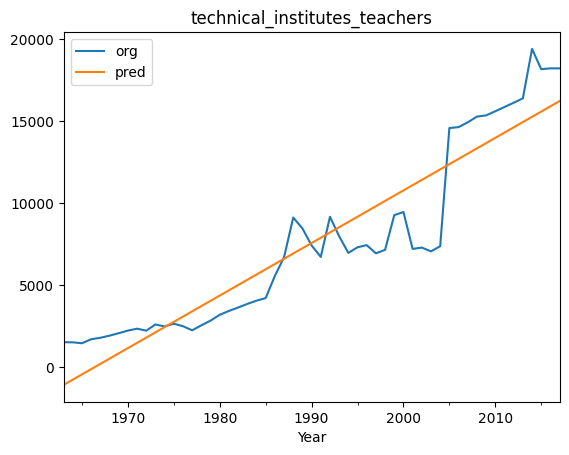

<Figure size 1000x600 with 0 Axes>

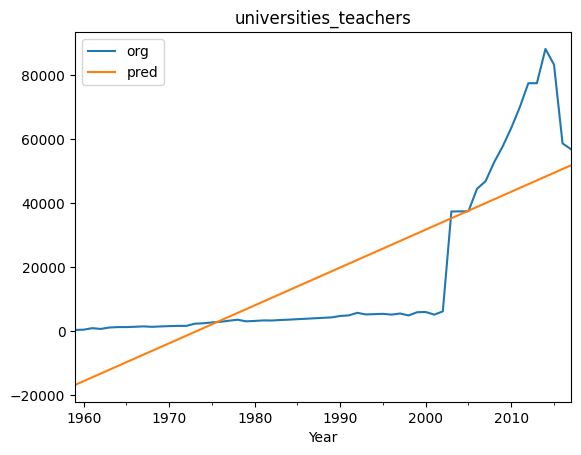

In [16]:
for col_name in df.columns:
    mask = ~np.isnan(df[col_name].values)
    X = df.index[mask].year.values.reshape(-1, 1)  
    y = df[col_name].values[mask]
    
    model = LinearRegression()

    model.fit(X, y)

    y_pred = model.predict(X)
    plt.figure(figsize=(10, 6))
    
    result = pd.DataFrame({'org': df[col_name], 'pred':y_pred}, index=df.index[mask])
    
    result.plot()
    plt.title(col_name)

# Nichtlineare Regression: Potenzfunktion

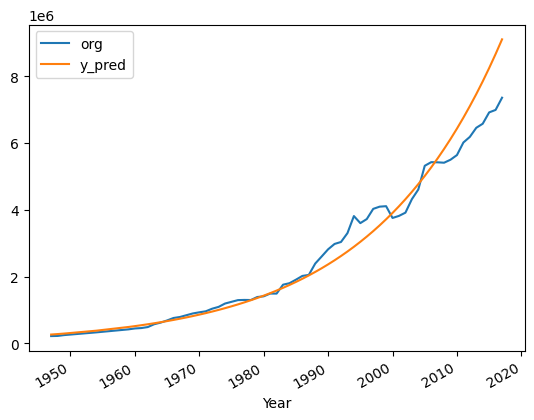

In [17]:
def potency_function(col_name, X, y):
    
# X und y logarithmieren um die Funktion der linearen Regression zu nutzen
# model mit x und y fitten
# a_log und b als Rückgabe erhalten
# mit X y_log_pred erhalten
# zu y Rücktransformieren
# plotten


    X = np.log(df[col_name].index.year.values).reshape(-1, 1)     # X logarithmiert
    y = np.log(df[col_name].values)                               # y logarithmiert


    model = LinearRegression()                                          # Modell erstellen
    model.fit(X, y)                                                     # Modell mit den logarithmierten werten fitten

    b = model.coef_                                                     # Die Steigung ist nicht logarithmiert
    a_log = model.intercept_                                            # Y-Achsenschnitt bereits logarithmiert

    a = np.exp(a_log)                                                   # Rücktransformation von a_log

    y_log_pred = model.predict(X)                                       # Logarithmierte Vorhersage

    y_pred = np.exp(y_log_pred)                                         # Rücktransformation der Vorhersage
    
    pd.DataFrame({"org": df[col_name], "y_pred": y_pred}).plot()
    return y_pred, a, b

col_name = "middle_students"

y_pred, a, b = potency_function(col_name, df[col_name].index.year.values.reshape(-1, 1), df[col_name].values)


# Nichtlineare Regression: Exponentielle Funktion

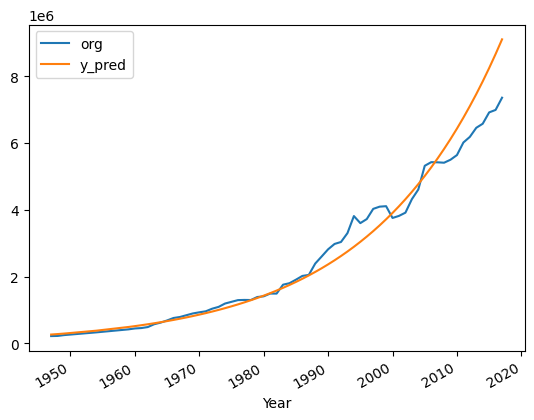

In [18]:
def exponential_regression(col_name, X, y):

    X = df[col_name].index.year.values.reshape(-1,1)    # X Werte
    y = np.log(df[col_name].values)                     # y logarithmiert

    model = LinearRegression()                          # Modell erstellen
    model.fit(X, y)                                     # modell fitten

    b_log = model.coef_                                 # Die Steigung ist logarithmiert
    a_log = model.intercept_                            # Der Y-Achsenschnitt ist logarithmiert
    
    b = np.exp(b_log)                                   # Rücktransformiert
    a = np.exp(a_log)                                   # Rücktransformiert

    y_log_pred = model.predict(X)                       # Predicten mit Log werten

    y_pred = np.exp(y_log_pred)                         # Rücktransformation
    
    pd.DataFrame({"org": df[col_name], "y_pred": y_pred}).plot()    # Plot
    return y_pred, a, b



col_name = "middle_students"

y_pred, a, b = potency_function(col_name, df[col_name].index.year.values.reshape(-1, 1), df[col_name].values)

In [19]:
class PotenzRegression(LinearRegression):
    def fit(self, X, y, *args, **kwargs):
        super().fit(np.log(X), np.log(y), *args, **kwargs)
        self.intercept_ = np.exp(self.intercept_)
        return self
 
    def predict(self, X):
        return self.intercept_ * X ** self.coef_

In [20]:
class ExponentialRegression(LinearRegression):
    def fit(self, X, y, *args, **kwargs):
        super().fit(X, np.log(y))
        self.intercept_ = np.exp(self.intercept_)
        return self
        
    def predict(self, X):
        return self.intercept_ * self.coef_ ** X

In [21]:
class LogisticRegression(LinearRegression):
    def fit(self, X, y, *args, **kwargs):
        pass